In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv("Diabetes.csv")

In [4]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
data.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [6]:
classes={'tested_positive':1,'tested_negative':0}
data['class']=[classes[item] for item in data['class']]
Y=data['class']
X=data.drop(columns=['class'])
Y.value_counts()

0    500
1    268
Name: class, dtype: int64

In [7]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [8]:
data.isnull().sum()

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [9]:
data['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [10]:
data.duplicated().sum()

0

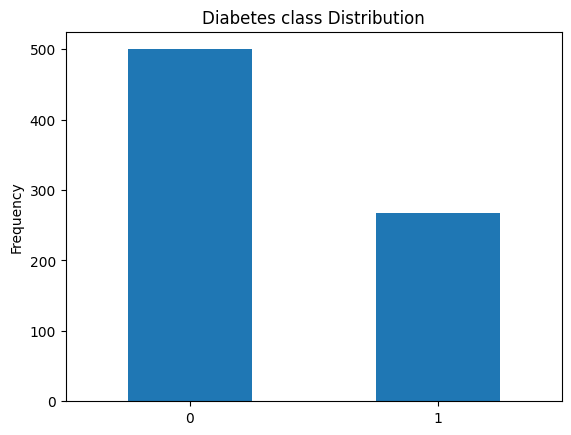

In [11]:
count_classes=pd.value_counts(data['class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Diabetes class Distribution")
plt.ylabel("Frequency")
plt.show()

# Plotting few plots

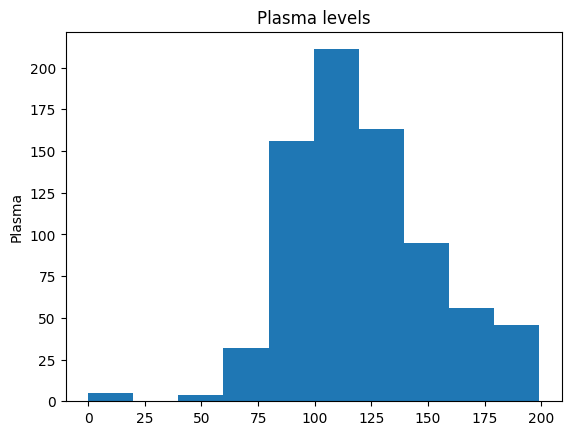

In [12]:
plt.hist(data['plas']);
plt.title("Plasma levels");
plt.ylabel("Plasma");

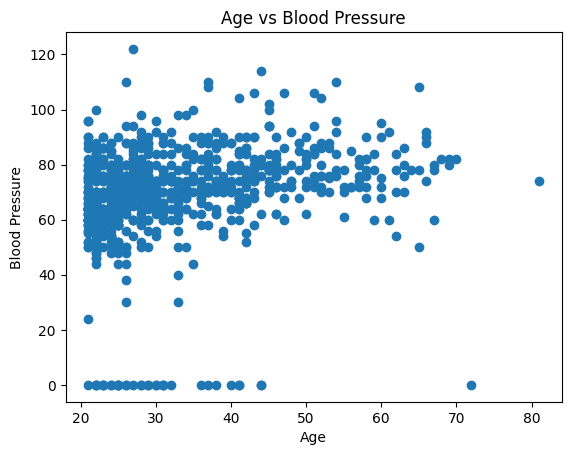

In [13]:
plt.scatter(y=data['pres'],x=data['age']);
plt.title("Age vs Blood Pressure");
plt.xlabel("Age");
plt.ylabel("Blood Pressure");

In [14]:
from imblearn.over_sampling import SMOTE
# smk=SMOTETomek(random_state=42)
# x_res,y_res=smk.fit_sample(X,Y)
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(X, Y)

In [15]:
x_res.shape,y_res.shape

((1000, 8), (1000,))

In [16]:
data.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
x_res

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.600000,0.627000,50
1,1,85,66,29,0,26.600000,0.351000,31
2,8,183,64,0,0,23.300000,0.672000,32
3,1,89,66,23,94,28.100000,0.167000,21
4,0,137,40,35,168,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
995,4,130,81,0,0,38.058063,0.833184,38
996,6,116,0,0,0,10.555397,0.221906,28
997,10,143,91,35,142,36.849527,0.327515,48
998,9,155,84,29,158,34.280686,1.131831,40


In [18]:
y_res.value_counts()

1    500
0    500
Name: class, dtype: int64

In [19]:
df=x_res

In [20]:
df['result']=y_res
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df = df.rename(columns = {'preg': 'num_preg', 'plas': 'gluc_conc',
                           'pres':'diastolic_bp','skin':'skin_thick',
                           'insu':'insulin','mass':'bmi',
                          'pedi':'Diab_Pred'})
df.head()

,num_preg,gluc_conc,diastolic_bp,skin_thick,insulin,bmi,Diab_Pred,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print('The mean of Glucose Concentration : {0}'.format(df['gluc_conc'].mean()))
print('The mean of Diastolic BP : {0}'.format(df['diastolic_bp'].mean()))
print('The mean of Skin Thickness : {0}'.format(df['skin_thick'].mean()))
print('The mean of Insulin : {0}'.format(df['insulin'].mean()))
print('The mean of BMI : {0}'.format(df['bmi'].mean()))
print('The mean of Diab Pedigree : {0}'.format(df['Diab_Pred'].mean()))
print('The mean of Age : {0}'.format(df['age'].mean()))

The mean of Glucose Concentration : 125.437
The mean of Diastolic BP : 69.393
The mean of Skin Thickness : 20.705
The mean of Insulin : 84.831
The mean of BMI : 32.75079407228626
The mean of Diab Pedigree : 0.4868334416210545
The mean of Age : 33.893


In [23]:
df['gluc_conc']=df['gluc_conc'].replace(0,125.12)
df['diastolic_bp']=df['diastolic_bp'].replace(0,69.24)
df['skin_thick']=df['skin_thick'].replace(0,21.1)
df['insulin']=df['insulin'].replace(0,85.24)
df['bmi']=df['bmi'].replace(0,32.83)
df['Diab_Pred']=df['Diab_Pred'].replace(0,0.503)
df['age']=df['age'].replace(0,33)

In [24]:
df.head()

,num_preg,gluc_conc,diastolic_bp,skin_thick,insulin,bmi,Diab_Pred,age,result
0,6,148.0,72.0,35.0,85.24,33.6,0.627,50,1
1,1,85.0,66.0,29.0,85.24,26.6,0.351,31,0
2,8,183.0,64.0,21.1,85.24,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.00,43.1,2.288,33,1


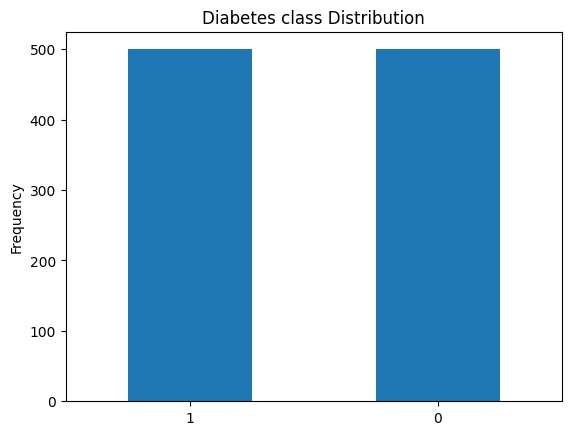

In [25]:
count_classes=pd.value_counts(df['result'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Diabetes class Distribution")
plt.ylabel("Frequency")
plt.show()

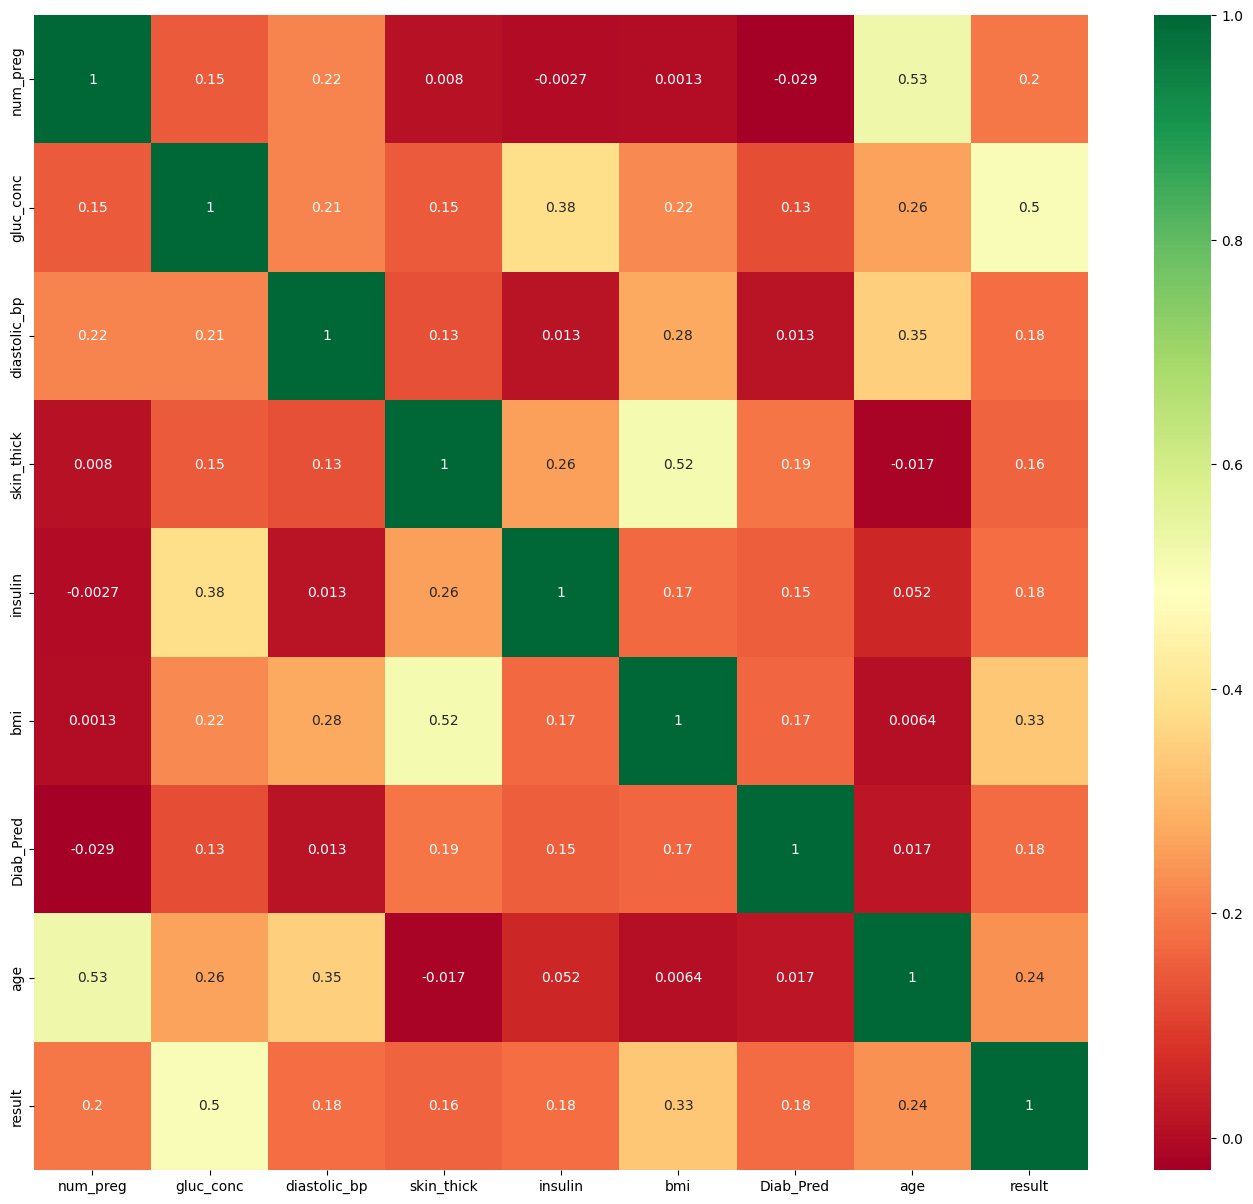

In [26]:
plt.figure(figsize=(17,15))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

In [27]:
x=df.drop(columns=['result']).values
y=df['result'].values
x[4]

array([  0.   , 137.   ,  40.   ,  35.   , 168.   ,  43.1  ,   2.288,
        33.   ])

In [28]:
from sklearn.model_selection import GridSearchCV,train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [29]:
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['gluc_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("number of rows missing skin_thick: {0}".format(len(df.loc[df['skin_thick'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['Diab_Pred'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

total number of rows : 1000
number of rows missing glucose_conc: 0
number of rows missing diastolic_bp: 0
number of rows missing skin_thick: 0
number of rows missing insulin: 0
number of rows missing bmi: 0
number of rows missing diab_pred: 0
number of rows missing age: 0


In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(random_state=10)
random_forest_model.fit(x_train,y_train.ravel())
prediction=random_forest_model.predict(x_test)

In [31]:
from sklearn import metrics 
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, prediction)))


Accuracy = 0.783


In [32]:
params={
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,14),
    'min_samples_leaf':range(1,5)
    
}

In [33]:
gridi=GridSearchCV(random_forest_model,param_grid=params,cv=10,verbose=1,n_jobs=-1)

In [34]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [35]:
from datetime import datetime
start_time = timer(None) 
gridi.fit(x_train,y_train.ravel())
timer(start_time) 

Fitting 10 folds for each of 936 candidates, totalling 9360 fits

 Time taken: 0 hours 1 minutes and 51.11 seconds.


In [36]:
gridi.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [37]:
gridi.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=5,
                       random_state=10)

In [38]:
from sklearn.metrics import accuracy_score
y_preds=random_forest_model.predict(x_test)
accuracy_score(y_test,y_preds)

0.7833333333333333

In [39]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_preds)
conf_matrix

array([[102,  37],
       [ 28, 133]], dtype=int64)

<AxesSubplot: >

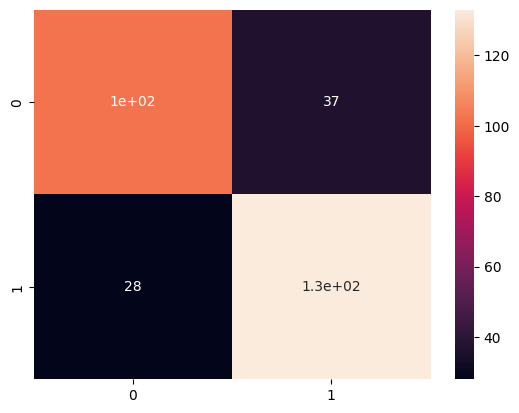

In [40]:
sns.heatmap(conf_matrix,annot=True)

In [41]:
random_forest_model=RandomForestClassifier(criterion='gini',max_depth=8,min_samples_leaf=1,min_samples_split=2,random_state=10)

In [42]:
random_forest_model.fit(x_train,y_train.ravel())
prediction=random_forest_model.predict(x_test)
print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, prediction)))

Accuracy = 0.783


In [43]:
pred=[6,98,72,35,0,33.6,0.627,20]
random_forest_model.predict([pred])[0]

0

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
Tree_model=DecisionTreeClassifier()

In [45]:
Tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
from sklearn.metrics import accuracy_score
y_preds=Tree_model.predict(x_test)
accuracy_score(y_test,y_preds)

0.7433333333333333

In [47]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_preds)
conf_matrix

array([[100,  39],
       [ 38, 123]], dtype=int64)

<AxesSubplot: >

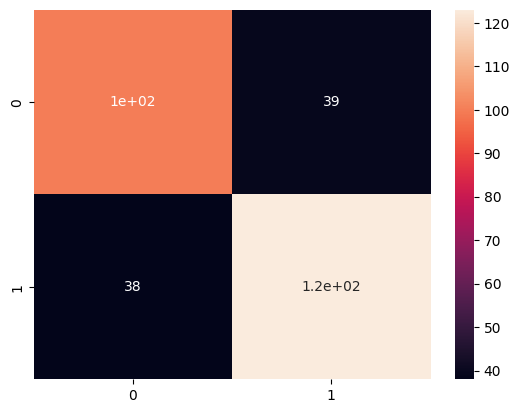

In [48]:
sns.heatmap(conf_matrix,annot=True)

In [49]:
prediction_tree=Tree_model.predict(x_test)

In [50]:
print(prediction_tree[10:25])
print(y_test[10:25])

[1 0 1 1 0 1 1 0 1 1 1 0 0 0 0]
[1 1 0 1 0 1 1 1 1 0 1 0 0 1 0]


In [51]:
metrics.accuracy_score(y_test,prediction_tree)

0.7433333333333333

In [52]:
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [53]:
grid=GridSearchCV(Tree_model,param_grid=param_dict,cv=10,verbose=3,n_jobs=-1)

In [54]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=3)

In [55]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [56]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=5)

In [57]:
Tree_model=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=1,min_samples_split=7)

In [58]:
Tree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=7)

In [59]:
prediction_tree=Tree_model.predict(x_test)
metrics.accuracy_score(y_test,prediction_tree)

0.7566666666666667

# Support Vector Machine

In [60]:
from sklearn import svm

In [61]:
clf = svm.SVC()

In [62]:
clf.fit(x_train,y_train)

SVC()

In [63]:
y_preds=clf.predict(x_test)
accuracy_score(y_test,y_preds)

0.71

In [64]:
conf_matrix=confusion_matrix(y_test,y_preds)
conf_matrix

array([[104,  35],
       [ 52, 109]], dtype=int64)

In [65]:
prediction_svm=clf.predict(x_test)

In [66]:
print(prediction_svm[10:25])
print(y_test[10:25])

[0 0 1 1 1 1 1 1 1 1 1 0 1 0 0]
[1 1 0 1 0 1 1 1 1 0 1 0 0 1 0]


In [67]:
metrics.accuracy_score(y_test,prediction_svm)

0.71

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [70]:
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [71]:
model.classes_

array([0, 1], dtype=int64)

In [72]:
model.intercept_

array([-5.44486203])

In [73]:
model.coef_

array([[ 0.06538096,  0.03389295, -0.02579592, -0.00597023, -0.00086277,
         0.07144389,  0.46279917,  0.01422992]])

In [74]:
model.predict_proba(x_test)

array([[0.67573633, 0.32426367],
       [0.62795545, 0.37204455],
       [0.85568408, 0.14431592],
       [0.68847095, 0.31152905],
       [0.0817776 , 0.9182224 ],
       [0.62062925, 0.37937075],
       [0.58481039, 0.41518961],
       [0.27556029, 0.72443971],
       [0.0960627 , 0.9039373 ],
       [0.10224517, 0.89775483],
       [0.81343618, 0.18656382],
       [0.60202587, 0.39797413],
       [0.43291423, 0.56708577],
       [0.3884522 , 0.6115478 ],
       [0.70266064, 0.29733936],
       [0.29924853, 0.70075147],
       [0.20410354, 0.79589646],
       [0.46575029, 0.53424971],
       [0.26599638, 0.73400362],
       [0.3896545 , 0.6103455 ],
       [0.17643053, 0.82356947],
       [0.78326433, 0.21673567],
       [0.68173116, 0.31826884],
       [0.77853436, 0.22146564],
       [0.68298209, 0.31701791],
       [0.53074353, 0.46925647],
       [0.23858439, 0.76141561],
       [0.38717432, 0.61282568],
       [0.34830285, 0.65169715],
       [0.66994081, 0.33005919],
       [0.

0.71

In [77]:
 model.score(x_test, y_test)

0.7466666666666667